In [1]:
import numpy as np
import pandas as pd

In [54]:
import warnings
warnings.filterwarnings("ignore")

In [76]:
bd = pd.read_excel('hakaton_nn_1month.xlsx')

In [34]:
bd

,party_rk,region,offenceshortstatement,offencedate,offencetime,engine_type,engine_power,body_type,auto_mark,auto_year,...,gear_type,car_price,gender_cd,age,marital_status_cd,children_cnt,education_level_cd,person_monthly_income_amt,day_of_week,public_holiday
0,622025641,Москва,Движение по обочине,2024-05-15,09:52:48,1.8,152.0,Универсал (5 дв.),SKODA,2011.0,...,Автоматическая,712,M,23.0,UNM,0.0,UGR,80.0,Среда,f
1,696133759,Воронежская область,Превышение скорости на 40-60 км/ч,2024-05-13,17:54:58,1.6,73.0,Седан (4 дв.),LADA (ВАЗ),2011.0,...,Механическая,162,M,19.0,NaN,0.0,NaN,45.0,Понедельник,f
2,1057242004,Севастополь,Превышение скорости на 20-40 км/ч,2024-05-10,00:29:11,2.5,145.0,Микроавтобус (5 дв.),HYUNDAI,2018.0,...,Автоматическая,2601,M,43.0,NaN,NaN,NaN,500.0,Пятница,t
3,300624658,Республика Тыва,Превышение скорости на 20-40 км/ч,2024-05-02,21:44:46,2.0,150.0,Седан (4 дв.),MITSUBISHI,2007.0,...,Механическая,410,M,27.0,UNM,0.0,SCH,35.0,Четверг,f
4,702484296,Воронежская область,Превышение скорости на 20-40 км/ч,2024-04-28,16:25:51,2.3,155.0,Универсал (5 дв.),FORD,2004.0,...,Автоматическая,617,F,42.0,MAR,0.0,GRD,50.0,Воскресенье,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97302,697259855,Челябинская область,Превышение скорости на 20-40 км/ч,2024-05-16,09:53:16,2.5,171.0,Универсал (5 дв.),NISSAN,2019.0,...,Автоматическая,2258,F,40.0,NaN,0.0,NaN,200.0,Четверг,f
97303,621105050,Москва,Нарушение разметки,2024-05-22,18:47:59,1.6,98.0,Универсал (5 дв.),LADA (ВАЗ),2011.0,...,Автоматическая,318,M,41.0,MAR,0.0,GRD,125.0,Среда,f
97304,959033708,Брянская область,Превышение скорости на 20-40 км/ч,2024-05-14,16:08:38,1.6,109.0,Универсал (5 дв.),CHEVROLET,2007.0,...,Механическая,422,M,46.0,UNM,0.0,NaN,35.0,Вторник,f
97305,231902303,Москва,Не пропустил пешехода,2024-05-16,11:18:26,2.0,151.0,Хэтчбек (5 дв.),DODGE,2010.0,...,Автоматическая,552,M,32.0,MAR,0.0,GRD,200.0,Четверг,f


In [35]:
bd['offencetime'] = bd['offencetime'].astype('datetime64[ns]')

TypeError: <class 'datetime.time'> is not convertible to datetime, at position 0

In [6]:
bd = bd[bd['age'] >= 18]

<Axes: >

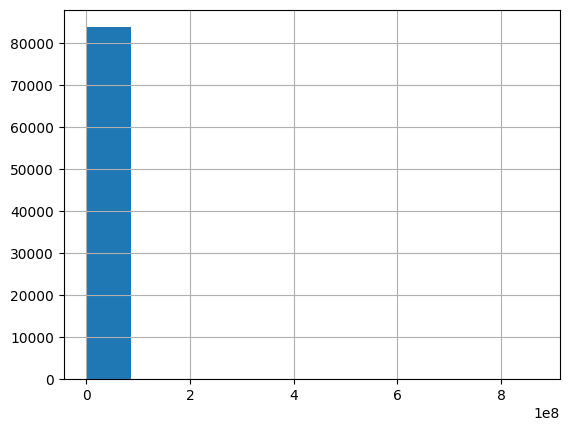

In [12]:
bd['person_monthly_income_amt'].hist()

In [8]:
bd['person_monthly_income_amt'].mean()

np.float64(10544.173549972562)

In [30]:
ForCorrel = bd.select_dtypes(include='number')
ForCorrel.corr()

,party_rk,engine_type,engine_power,auto_year,age,children_cnt,person_monthly_income_amt
party_rk,1.000000,-0.013938,-0.118231,-0.111322,-0.082137,-0.099763,-0.002960
engine_type,-0.013938,1.000000,0.160862,-0.018562,0.005632,-0.001486,0.000319
engine_power,-0.118231,0.160862,1.000000,0.156878,0.048547,-0.000681,0.002557
auto_year,-0.111322,-0.018562,0.156878,1.000000,0.131447,0.030751,-0.005645
age,-0.082137,0.005632,0.048547,0.131447,1.000000,0.137667,0.004075
children_cnt,-0.099763,-0.001486,-0.000681,0.030751,0.137667,1.000000,0.008333
person_monthly_income_amt,-0.002960,0.000319,0.002557,-0.005645,0.004075,0.008333,1.000000


In [16]:
# bd['engine_type'] = bd['engine_type'].astype('float')
bd['engine_type'].unique()

array(['1.8 ', '1.6 ', '2.5 ', '2.0 ', '2.3 ', '3.0 ', '2.4 ', '3.5 ',
       '2.1 ', '4.7 ', '1.4 ', '1.5 ', '2.9 ', '2.7 ', '3.6 ', '4.4 ',
       '6.2 ', '5.3 ', '4.0 ', '2.8 ', '4.2 ', '2.2 ', '3.7 ', '1.3 ',
       '5.5 ', '1.7 ', '4.5 ', '1.2 ', '5.0 ', '5.7 ', '3.2 ', '5.6 ',
       '0.0 ', '6.5 ', '1.0 ', '1.9 ', '0.6 ', '0.8 ', '3.8 ', '4.6 ',
       '0.00 ', '5.9 ', '6.0 ', '3.4 ', '4.1 ', '3.3 ', '999.0 ', '0.1 ',
       '6.1 ', '4.8 ', '6.7 ', '6.4 ', '1.1 ', '2.6 ', '4.3 ', '3.1 ',
       '6.8 ', '0.2 ', '14.5 ', '15.0 ', '0.7 ', 'Бензиновый на бензине',
       '18.0 ', '3.9 ', '5.2 ', '5.4 ', '0.65 ', '0.9 ', '5.8 ', '19.6 ',
       '13.6 ', '22.9 ', '6.6 ', '4.9 ', '16.0 ', '1', '3.7 i ', '24.8 ',
       '36.0 ', '12.0 ', '12.8 '], dtype=object)

In [77]:
bd = bd[bd['engine_type'] != 'Бензиновый на бензине']
bd['engine_type'] = bd['engine_type'].str.replace(' ', '').str.replace('i', '').astype('float')
# bd['engine_type'] = bd['engine_type'].astype('float')

In [19]:
bd['engine_power'].unique()

array(['152.00', '73.00', '145.00', '150.00', '155.00', '265.00',
       '249.00', '204.00', '435.00', '147.00', '192.00', '106.00',
       '211.00', '122.00', '105.00', '90.00', '125.00', '290.00',
       '306.00', '100.00', '181.00', '163.00', '184.00', '115.00',
       '76.00', '186.00', '107.00', '109.00', '190.00', '123.00',
       '140.00', '118.00', '194.00', '167.00', '166.00', '131.00',
       '77.00', '124.00', '179.00', '449.00', '75.00', '117.00', '160.00',
       '112.00', '110.00', '144.00', '431.00', '250.00', '426.00',
       '103.00', '139.00', '325.00', '136.00', '650.00', '102.00',
       '81.00', '182.00', '238.00', '126.00', '129.00', '401.00', '98.00',
       '82.00', '218.00', '141.00', '200.00', '172.00', '68.00', '280.00',
       '171.00', '421.00', '165.00', '170.00', '177.00', '277.00',
       '241.00', '74.00', '272.00', '116.00', '156.00', '247.00',
       '315.00', '231.00', '148.00', '95.00', '224.00', '87.00', '387.00',
       '89.00', '84.00', '230.00',

In [78]:
bd['engine_power'] = bd['engine_power'].str.replace(' ', '').str.replace('i', '').astype('float')

In [79]:
bd['auto_year'] = bd['auto_year'].dropna().astype('int')

In [81]:
bd['car_price'] = bd['car_price'][bd['car_price'] != ';M'].dropna().astype('float')

In [82]:
bd['offencetime'] = pd.to_datetime(bd['offencetime'], format='%H:%M:%S').dt.time

<Axes: >

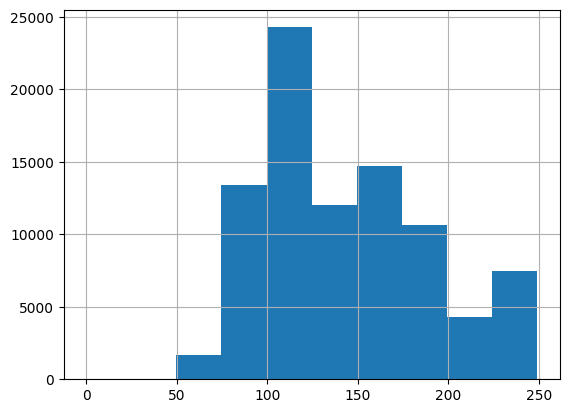

In [47]:
bd[bd['engine_power'] < 250]['engine_power'].hist()

<Axes: >

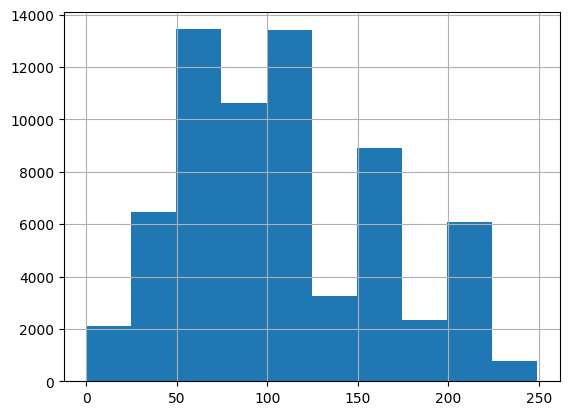

In [52]:
bd[bd['person_monthly_income_amt'] < 250]['person_monthly_income_amt'].hist()

In [74]:
etm = bd['engine_type'].mean()
etsigma = bd['engine_type'].std()

epm = bd['engine_power'].mean()
epsigma = bd['engine_power'].std()

pim = bd['person_monthly_income_amt'].mean()
pisigma = bd['person_monthly_income_amt'].std()

bd = bd[ bd['person_monthly_income_amt'] < pim+2*pisigma ][ bd['person_monthly_income_amt'] > pim-2*pisigma ][ bd['engine_type'] < etm+2*etsigma ][ bd['engine_type'] > etm-2*etsigma ][ bd['engine_power'] < epm+2*epsigma ][ bd['engine_power'] > epm-2*epsigma ]
bd

,party_rk,region,offenceshortstatement,offencedate,offencetime,engine_type,engine_power,body_type,auto_mark,auto_year,...,gear_type,car_price,gender_cd,age,marital_status_cd,children_cnt,education_level_cd,person_monthly_income_amt,day_of_week,public_holiday
0,622025641,Москва,Движение по обочине,2024-05-15,09:52:48,1.8,152.0,Универсал (5 дв.),SKODA,2011.0,...,Автоматическая,712.0,M,23.0,UNM,0.0,UGR,80.0,Среда,f
1,696133759,Воронежская область,Превышение скорости на 40-60 км/ч,2024-05-13,17:54:58,1.6,73.0,Седан (4 дв.),LADA (ВАЗ),2011.0,...,Механическая,162.0,M,19.0,NaN,0.0,NaN,45.0,Понедельник,f
2,1057242004,Севастополь,Превышение скорости на 20-40 км/ч,2024-05-10,00:29:11,2.5,145.0,Микроавтобус (5 дв.),HYUNDAI,2018.0,...,Автоматическая,2601.0,M,43.0,NaN,NaN,NaN,500.0,Пятница,t
3,300624658,Республика Тыва,Превышение скорости на 20-40 км/ч,2024-05-02,21:44:46,2.0,150.0,Седан (4 дв.),MITSUBISHI,2007.0,...,Механическая,410.0,M,27.0,UNM,0.0,SCH,35.0,Четверг,f
4,702484296,Воронежская область,Превышение скорости на 20-40 км/ч,2024-04-28,16:25:51,2.3,155.0,Универсал (5 дв.),FORD,2004.0,...,Автоматическая,617.0,F,42.0,MAR,0.0,GRD,50.0,Воскресенье,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97302,697259855,Челябинская область,Превышение скорости на 20-40 км/ч,2024-05-16,09:53:16,2.5,171.0,Универсал (5 дв.),NISSAN,2019.0,...,Автоматическая,2258.0,F,40.0,NaN,0.0,NaN,200.0,Четверг,f
97303,621105050,Москва,Нарушение разметки,2024-05-22,18:47:59,1.6,98.0,Универсал (5 дв.),LADA (ВАЗ),2011.0,...,Автоматическая,318.0,M,41.0,MAR,0.0,GRD,125.0,Среда,f
97304,959033708,Брянская область,Превышение скорости на 20-40 км/ч,2024-05-14,16:08:38,1.6,109.0,Универсал (5 дв.),CHEVROLET,2007.0,...,Механическая,422.0,M,46.0,UNM,0.0,NaN,35.0,Вторник,f
97305,231902303,Москва,Не пропустил пешехода,2024-05-16,11:18:26,2.0,151.0,Хэтчбек (5 дв.),DODGE,2010.0,...,Автоматическая,552.0,M,32.0,MAR,0.0,GRD,200.0,Четверг,f


In [75]:
bd.pivot_table(index='region', values='person_monthly_income_amt', aggfunc=['mean', 'count'])

,mean,count
,person_monthly_income_amt,person_monthly_income_amt
region,,
Алтайский край,170.075780,673
Амурская область,207.363636,33
Архангельская область,107.608696,92
Астраханская область,128.142012,169
Белгородская область,110.075829,211
...,...,...
Челябинская область,122.634490,2911
Чеченская республика,95.325581,172


In [84]:
bd["day_of_week"] = bd["day_of_week"].str.replace('Понедельник', "1")
bd["day_of_week"] = bd["day_of_week"].str.replace('Вторник', "2")
bd["day_of_week"] = bd["day_of_week"].str.replace('Среда', "3")
bd["day_of_week"] = bd["day_of_week"].str.replace('Четверг', "4")
bd["day_of_week"] = bd["day_of_week"].str.replace('Пятница', "5")
bd["day_of_week"] = bd["day_of_week"].str.replace('Суббота', "6")
bd["day_of_week"] = bd["day_of_week"].str.replace('Воскресенье', "7")
bd["day_of_week"] = bd["day_of_week"].astype('int')
bd








AttributeError: Can only use .str accessor with string values!

In [86]:
bd['offenceshortstatement'].unique

<bound method Series.unique of 0                      Движение по обочине
1        Превышение скорости на 40-60 км/ч
2        Превышение скорости на 20-40 км/ч
3        Превышение скорости на 20-40 км/ч
4        Превышение скорости на 20-40 км/ч
                       ...                
97302    Превышение скорости на 20-40 км/ч
97303                   Нарушение разметки
97304    Превышение скорости на 20-40 км/ч
97305                Не пропустил пешехода
97306                   Нарушение разметки
Name: offenceshortstatement, Length: 97302, dtype: object>